In [5]:
from batch import BatchResult
batch_params = {
    "N": [100],
    "province": ["Ontario"],
    "random_seed": range(0,7),
    "n_segregation_steps": [41],
    "global_util_thresh": [0.1],
    "price_weight_mode": [0.3],
    "ts_step_length": ["w"],
    "start_year": 2020,
    "refurbishment_rate": 0.03,
    "hp_subsidy": 0.1,
    "fossil_ban_year": 2030
}

res = BatchResult.from_parameters(batch_params, max_steps=100)


results_dir=WindowsPath('c:/src/canadopt/abetam/results/subsidy_tracking/502adf5d021f44dca636d206f1698b07') does not exist. Running model.


100%|██████████| 7/7 [00:18<00:00,  2.69s/it]


# Calculation of subsidies

Total amount of subsidies $T^S$

$$
T^S = \sum_y N^p_y * s * P_y 
$$
with 
* Purchase price at year $y$: $P_y$
* subsidy fraction $s$
* amount of purchases in a year $N^p_y$

where $P_y = C_{y,i} * \dot{D}$ 

In [6]:
(res.tech_shares_df.set_index(["RunId","province","year"]).sum(axis=1)*100 - 100.0 > 1e-6).sum()



0

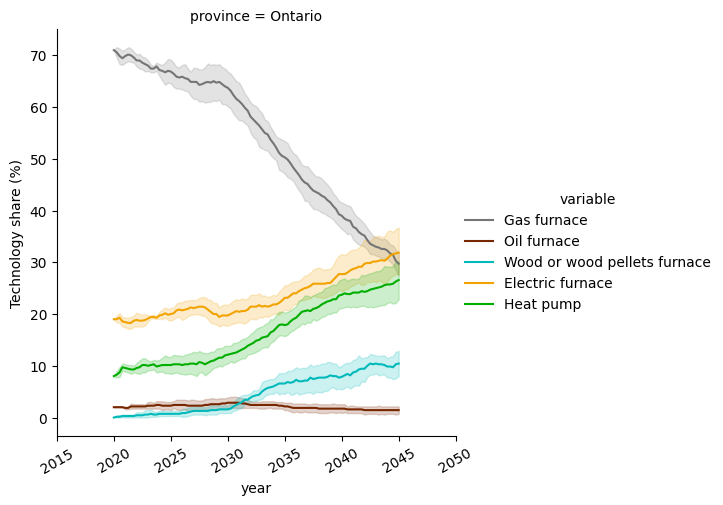

In [7]:
res.tech_shares_fig()

In [8]:
res.mean_carrier_demand_df

Fuels.NATURAL_GAS Fuels.HEATING_OIL  \
province year   hour                                        
Ontario  2020.0 0     2822826788.571429   75822159.428571   
                1          2484556800.0   66736099.428571   
                2     3065347620.571429   82336343.428571   
                3     4314663460.571428  115893427.428571   
                4     3186384676.571429   85587452.571429   
...                                 ...               ...   
         2045.0 48     826688813.714286   30028427.428571   
                49    1129948946.285714   41043972.571429   
                50    1009803885.714286   36679853.714286   
                51    1023285769.142857   37169565.428571   
                52     359587748.571429   13061572.071429   

                     Fuels.WOOD_OR_WOOD_PELLETS  Fuels.ELECTRICITY  
province year   hour                                                
Ontario  2020.0 0                           0.0   730650413.714286  
                1                           0.0   637536438.857143  
                2                           0.0   791374290.285714  
                3                           0.0  1130086262.857143  
                4                           0.0   823439725.714286  
...                                         ...                ...  
         2045.0 48             312382075.428571   918395684.571429  
                49             426975460.571429  1277277833.142857  
                50                  381576064.0       1133296576.0  
                51             386670491.428571  1149197622.857143  
                52             135877953.714286   409693289.142857  

[318 rows x 4 columns]

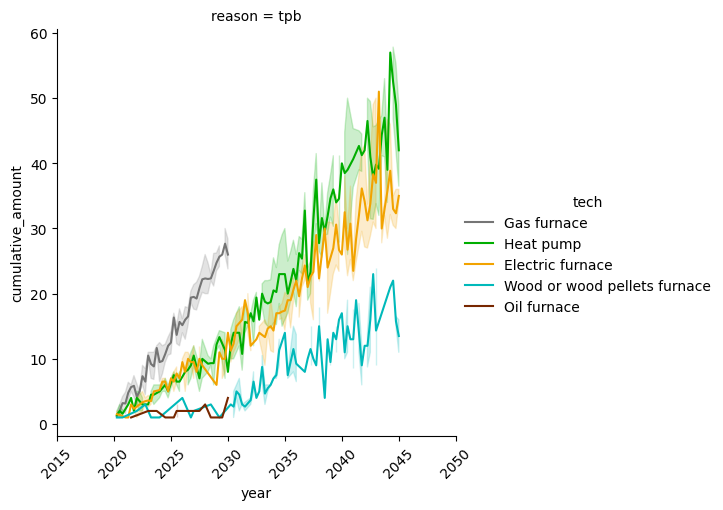

In [9]:
res.adoption_details_fig()

c:\src\canadopt\abetam\batch.py:664: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


<Axes: xlabel='year', ylabel='Appliance age'>

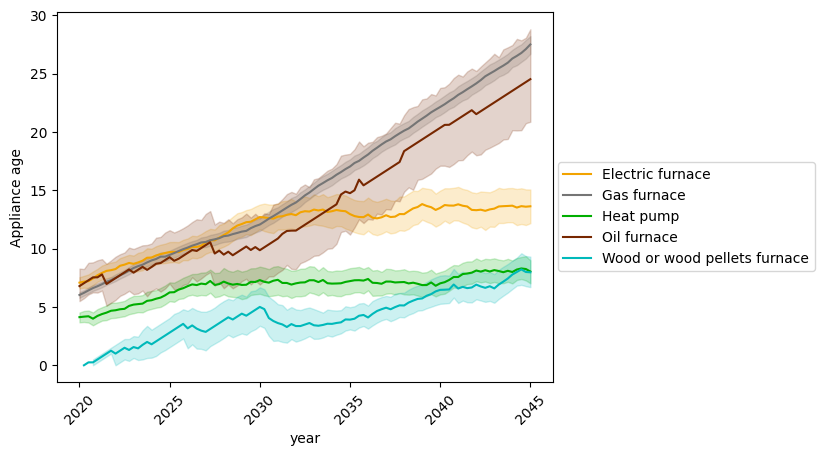

In [10]:
res.appliance_age_fig()

In [6]:
# res.adoption_details_df.groupby(["year","tech"])["amount"].sum().reset_index().pivot(columns="tech", index="year").fillna(0).plot()

In [7]:
if not res.path.exists():
    res.save()

# Calculation of emissions


In [8]:
res.emissions().head()

,Fuels.ELECTRICITY,Fuels.HEATING_OIL,Fuels.NATURAL_GAS,Fuels.WOOD_OR_WOOD_PELLETS
2020,0.468518,1.236682,18.345950,0.000000
2021,0.478142,1.386611,17.669145,0.034892
2022,0.487766,1.536540,16.992340,0.069785
2023,0.497391,1.686468,16.315534,0.104677
2024,0.507015,1.836397,15.638729,0.139569


In [9]:
import plotly.express as px

fig = px.line(res.emissions().cumsum(), template="plotly")
fig.update_layout(yaxis_title="CO2 Emissions (Mt)", width=500)

In [10]:
res.results_df["Energy demand time series"]

0        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
1        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
2        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
3        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
4        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
                               ...                        
70695    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70696    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70697    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70698    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70699    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
Name: Energy demand time series, Length: 70700, dtype: object